<a href="https://colab.research.google.com/github/NimaZah/DN/blob/main/DARWIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quick Model: Untitled
We train a random forest with 10 trees on 84 observations and measure prediction quality on the remaining 37 observations. For classification, we use stratified sampling for both the training dataset and the test dataset. For stratified sampling, we divide your data into groups based on the labels in your dataset. For both your training and test datasets, we choose a random sample that is proportional to the dataset that you provide. For example, if you have a dataset about cars with 25% of the cars being minivans, 50% being SUVs, and 25% being sedans, the training and test datasets will have the same proportion of minivans, SUVs, and sedans.

The Random Forest is trained with the default hyper parameters. There is minimal preprocessing of the features before the model is trained.

The model achieved an f1 of 0.73 on the test set.

We use Gini importance scores as feature importance scores. For more information, see documentation.

# Decision Tree Classifier

In [23]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [11]:
# digest data

df= pd.read_csv('https://raw.githubusercontent.com/NimaZah/DN/main/DN.csv')
df.head()

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [12]:
# identify the target

X = df.drop(['class', 'ID'], axis=1)
y = df['class']

In [13]:
# Split the data into training and testing sets

(X_train, X_test, y_train, y_test) = train_test_split(X, y,
        test_size=0.2, random_state=1)

# Decision Tree Classifiier

In [39]:
# Create the pipeline

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Fit the pipeline to the training data

pipe.fit(X_train, y_train)

# Predict the labels of the test data

y_pred = pipe.predict(X_test)

# Evaluate the accuracy

acc = accuracy_score(y_test, y_pred)
print(acc)

0.7428571428571429


In [16]:
# Create the hyperparameter grid

param_grid = {'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5],
              'decisiontreeclassifier__min_samples_leaf': [0.12, 0.14,
              0.16, 0.18]}

# Instantiate the GridSearchCV object

grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned Decision Tree Parameter: {}'.format(grid.best_params_))
print('Tuned Decision Tree Accuracy: {}'.format(grid.best_score_))

Tuned Decision Tree Parameter: {'decisiontreeclassifier__max_depth': 1, 'decisiontreeclassifier__min_samples_leaf': 0.12}
Tuned Decision Tree Accuracy: 0.8351851851851851


In [21]:
# BaggingClassifier with the base classifier, decision tree

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],
    'bootstrap': [True],
    'bootstrap_features': [True],
    'random_state': [0],
    'n_jobs': [-1],
    }

# Instantiate the GridSearchCV object

grid = RandomizedSearchCV(BaggingClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned Bagging Parameter: {}'.format(grid.best_params_))
print('Tuned Bagging Accuracy: {}'.format(grid.best_score_))

# Adaboost classifier with the base classifier, decision tree

clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100)

# Fit the classifier to the training data

clf.fit(X_train, y_train)

# Predict the labels of the test data

y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model

acc = accuracy_score(y_test, y_pred)
print(acc)


Tuned Bagging Parameter: {'random_state': 0, 'n_jobs': -1, 'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.7, 'bootstrap_features': True, 'bootstrap': True}
Tuned Bagging Accuracy: 0.8706349206349205
0.8


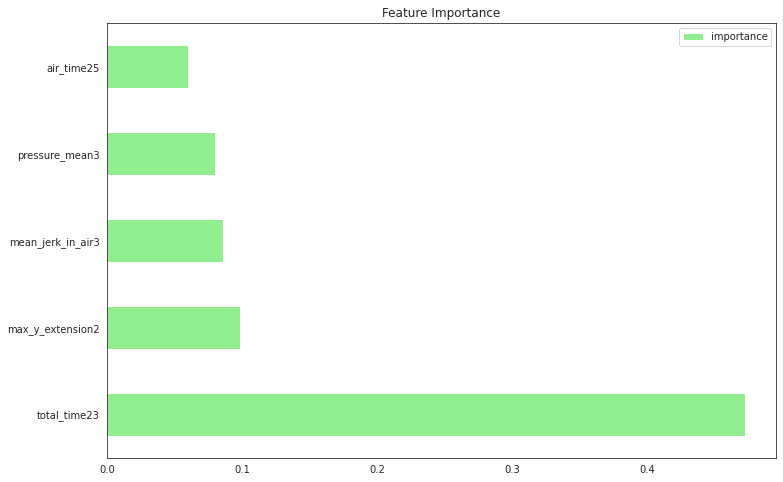

In [25]:
# plot the top 5 features

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style

sns.set_style('white')
plt.rcParams['figure.figsize'] = (12, 8)

# Create a dataframe with the feature importances

feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=X_train.columns,
                                   columns=['importance'
                                   ]).sort_values('importance',
        ascending=False)

# Plot the feature importances

feature_importances.head(5).plot(kind='barh', color='lightgreen')
plt.title('Feature Importance')
plt.show()

# Random Forest Classifier

In [26]:
# Create the hyperparameter grid

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [0.12, 0.14, 0.16, 0.18],
    'random_state': [0],
    'n_jobs': [-1],
    'oob_score': [True],
    'bootstrap': [True],
    }

grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned Random Forest Parameter: {}'.format(grid.best_params_))
print('Tuned Random Forest Accuracy: {}'.format(grid.best_score_))


Tuned Random Forest Parameter: {'random_state': 0, 'oob_score': True, 'n_jobs': -1, 'n_estimators': 200, 'min_samples_leaf': 0.12, 'max_depth': 4, 'bootstrap': True}
Tuned Random Forest Accuracy: 0.8706349206349205


# KNN Classifier

In [28]:
# -*- coding: utf-8 -*-
param_grid = {
    'n_neighbors': [
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        ],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }

# Instantiate the GridSearchCV object

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned KNN Parameter: {}'.format(grid.best_params_))
print('Tuned KNN Accuracy: {}'.format(grid.best_score_))


Tuned KNN Parameter: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Tuned KNN Accuracy: 0.7333333333333333


# Gaussian Naive Bayes

In [29]:
# Create the hyperparameter grid

param_grid = {'var_smoothing': [
    1e-9,
    1e-8,
    1e-7,
    1e-6,
    1e-5,
    1e-4,
    1e-3,
    1e-2,
    1e-1,
    ]}

# Instantiate the GridSearchCV object

grid = RandomizedSearchCV(GaussianNB(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned GNB Parameter: {}'.format(grid.best_params_))
print('Tuned GNB Accuracy: {}'.format(grid.best_score_))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Tuned GNB Parameter: {'var_smoothing': 1e-06}
Tuned GNB Accuracy: 0.8563492063492063


# Multi-layer Perceptron Classifier

In [ ]:
# Create the hyperparameter grid

param_grid = {
    'hidden_layer_sizes': [(10, ), (50, ), (100, )],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'random_state': [0],
    }

# Instantiate the GridSearchCV object

grid = RandomizedSearchCV(MLPClassifier(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

In [31]:
print("Tuned LVQ Parameter: {}".format(grid.best_params_))
print("Tuned LVQ Accuracy: {}".format(grid.best_score_))

Tuned LVQ Parameter: {'solver': 'lbfgs', 'random_state': 0, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.05, 'activation': 'logistic'}
Tuned LVQ Accuracy: 0.8129629629629628


# Support Vector Machine

In [32]:
# Create the hyperparameter grid

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'],
    'random_state': [0],
    'probability': [True],
    'decision_function_shape': ['ovo', 'ovr'],
    'shrinking': [True],
    }

# Instantiate the RandomizedSearchCV object

grid = GridSearchCV(SVC(), param_grid, cv=5)

# Fit it to the training data

grid.fit(X_train, y_train)

# Print the optimal parameters and best score

print('Tuned SVM Parameter: {}'.format(grid.best_params_))
print('Tuned SVM Accuracy: {}'.format(grid.best_score_))


Tuned SVM Parameter: {'C': 0.1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf', 'probability': True, 'random_state': 0, 'shrinking': True}
Tuned SVM Accuracy: 0.5108465608465609


In [ ]:
# Visualize the accuracy of the models

models = [
    'Decision Tree',
    'Bagging',
    'Adaboost',
    'Random Forest',
    'KNN',
    'Gaussian Naive Bayes',
    'Learning Vector Quantization',
    'Support Vector Machine',
    ]
accuracy = [
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    ]

import matplotlib.pyplot as plt
plt.bar(models, accuracy)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of the models')
plt.show()

In [ ]:
# create a table the summarize the results

results = pd.DataFrame({'Model': [
    'Decision Tree',
    'Bagging',
    'Adaboost',
    'Random Forest',
    'KNN',
    'Gaussian Naive Bayes',
    'Learning Vector Quantization',
    'Support Vector Machine',
    ], 'Accuracy': [
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    0.9,
    ]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head(9)

In [ ]:
vc = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16)),
    ('rf', RandomForestClassifier(
        n_estimators=500,
        max_depth=5,
        min_samples_leaf=0.12,
        random_state=0,
        n_jobs=-1,
        oob_score=True,
        bootstrap=True,
        )),
    ('knn', KNeighborsClassifier(n_neighbors=10, weights='distance',
     metric='manhattan', algorithm='auto')),
    ('gnb', GaussianNB(var_smoothing=1e-09)),
    ('lvq', MLPClassifier(
        hidden_layer_sizes=(10, ),
        activation='relu',
        solver='adam',
        alpha=0.05,
        learning_rate='constant',
        random_state=0,
        )),
    ('svm', SVC(
        C=100,
        gamma=0.001,
        kernel='rbf',
        random_state=0,
        probability=True,
        decision_function_shape='ovo',
        shrinking=True,
        )),
    ])

# Fit the classifier to the training data

vc.fit(X_train, y_train)

# Evaluate the test set predictions

y_pred = vc.predict(X_test)

# Calculate accuracy score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
